# Updated notebook with the new Lavision library


Lavision released a new Python library to read their files, called lvreader, read below: 

"
LaVision's Python library lvreader got a new version 1.2.0 and extended its feature list by dedicated read/write functionalities for particle data sets. This makes it possible to further analyze your Shake-the-Box or PTV data with your own Python post-processing scripts. Whether you are interested in whole particle distributions or single particle tracks from your experimental data, lvreader lets you directly access DaVis set files without the need of a further export step.

Using the particle write functions, it is possible to import particle data from other sources and use DaVis' advanced processing operations, such as binning or fine-scale reconstruction, to gain further insights into your data.

If you are already working with the most recent Python version 3.10, the new release of lvreader supports it now as well. Click   https://www.lavision.de/en/downloads/software/index.php   to download lvreader 1.2.0." 

Or use the direct link https://www.lavision.de/en/download.php?id=4817




In [8]:
# !pip install /home/user/Downloads/lvreader-1.2.0/lvreader-1.2.0-cp38-cp38-linux_x86_64.whl

In [2]:
from pivpy import io
from pivpy import graphics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import pkg_resources as pkg

In [7]:
# read the arrays
filename = pkg.resource_filename('pivpy','data/VC7/2Ca.VC7')
# data = io.load_vc7(filename)

In [8]:
from lvreader import read_buffer
from lvreader.frame import VectorFrame
import pathlib
vc7file = pathlib.Path('../../pivpy/data/VC7/2d2c/2Ca.vc7')
buffer = read_buffer(str(vc7file))
print(buffer)

Buffer(frames=[VectorFrame(components=<11 components: U0, V0, U1, V1, U2, V2, U3, V3, ACTIVE_CHOICE, ENABLED, TS:Peak ratio>, scales=Scales(x=Scale(slope=0.250682, offset=-146.611, unit='mm', description=''), y=Scale(slope=-0.250682, offset=-69.1388, unit='mm', description=''), z=Scale(slope=1.0, offset=0.0, unit='pixel', description=''), i=Scale(slope=0.0250682, offset=0.0, unit='m/s', description='velocity')), attributes={'Acq.Time': array([[10500.]]), 'AcqTimeSeries': '18040840 µs', 'CameraName': '1 * 1', 'FrameDt': '10000 us', 'FrameProcessing': '0', 'PeakRatioMode': '0'})], attributes={'AttributeDisplayDeviceData': 'SetupDialogBufferAttrDevData(-1)', 'AttributeDisplayFrameInfo': 'SetupDialogBufferAttrFrameInfo(-1)', 'DevDataAlias0': 'Camera 1: Exposure time', 'DevDataAlias1': 'Reference time 1', 'DevDataAlias2': 'Reference time dt 1', 'DevDataAlias3': 'Laser power 1A', 'DevDataAlias4': 'Laser power 1B', 'DevDataClass0': '1', 'DevDataClass1': '1', 'DevDataClass2': '1', 'DevDataClas

In [9]:
data = buffer[0]

In [12]:
data.components['U0'][0]

array([[-1.9564755 , -8.590713  , -1.3237044 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.7864587 , -1.3585458 , ..., -0.16470392,
        -1.0570866 , -1.070656  ],
       [-7.962536  , -1.657147  , -1.8321785 , ..., -0.2323415 ,
        12.0583725 ,  0.56896347],
       ...,
       [-4.816303  , -2.6758425 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.9959855 , -1.8640392 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

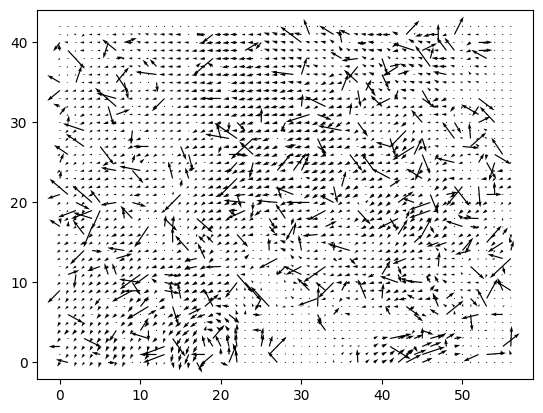

In [13]:
plt.figure()
plt.quiver(data.components['U0'][0], data.components['V0'][0])

In [6]:
plt.quiver(data.x, data.y, data.u.isel(t=0).transpose(), data.v.isel(t=0).transpose())

NameError: name 'data' is not defined

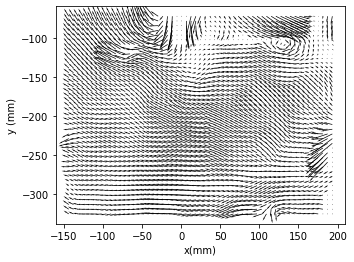

In [ ]:
tmp = data.copy()

tmp['u'] = tmp['u'].transpose()
tmp['v'] = tmp['v'].transpose()

graphics.quiver(tmp.isel(t=0),arrScale=10);

In [ ]:
# we created a shortcut to the above cells in pivpy.io
data = io.load_vc7( pkg.resource_filename('pivpy','data/VC7/2Cb.VC7'))
data['u'] = data['u'].transpose()
data['v'] = data['v'].transpose()

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x(mm)', ylabel='y (mm)'>)

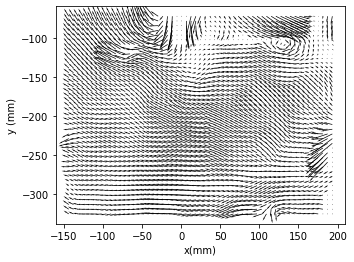

In [ ]:
graphics.quiver(data,arrScale=10)